In [120]:
import pandas as pd
import numpy as np 
import cmaes

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
# from sklearn.externals import joblib
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

%matplotlib inline

In [122]:
import optuna

In [123]:
df_train = pd.read_csv('../data/train.csv',delimiter=',',header='infer')
df_test = pd.read_csv('../data/test.csv',delimiter=',',header='infer')

In [124]:
df_train.head(5)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [125]:
df_train['NObeyesdad'].value_counts()

Obesity_Type_III       4046
Obesity_Type_II        3248
Normal_Weight          3082
Obesity_Type_I         2910
Insufficient_Weight    2523
Overweight_Level_II    2522
Overweight_Level_I     2427
Name: NObeyesdad, dtype: int64

In [126]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

No missing values are present 

In [127]:
# checking for dupilcates
print(f"No. of duplicates in train set: {df_train.duplicated().sum()}  \
       No. of duplicates in test set: {df_test.duplicated().sum()}")

No. of duplicates in train set: 0         No. of duplicates in test set: 0


In [128]:
df_train.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [129]:
df_train['NCP'].skew()

-1.5622532906429132

In [130]:
import seaborn as sns

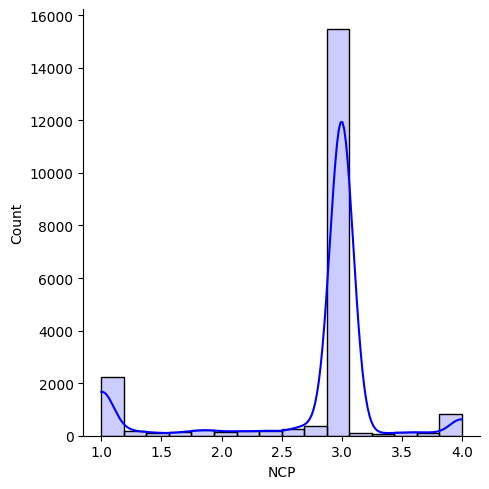

In [131]:
# density plot
sns.displot(df_train['NCP'], kde=True, alpha=0.2, color='blue')

1. Age column is right skewd
2. NCP is also skewd

In [132]:
# Handle skewdness of age 
log_age = np.log(df_train['Age'])
log_age.head(15)

0     3.196344
1     2.890372
2     2.890372
3     3.042269
4     3.454456
5     2.897471
6     3.397290
7     3.397573
8     2.833213
9     3.258097
10    2.995732
11    3.091042
12    2.890372
13    3.063977
14    2.995732
Name: Age, dtype: float64

In [133]:
log_age.skew()

0.8334430805394202

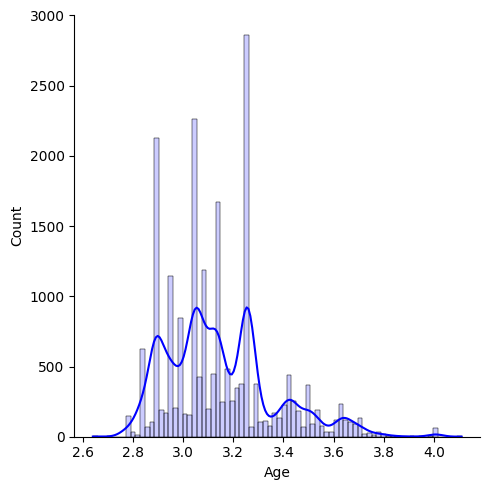

In [134]:
sns.displot(log_age, kde=True, alpha=0.2, color='blue')

In [135]:
sqr_age = np.sqrt(df_train['Age'])
sqr_age.head(15)

0     4.943987
1     4.242641
2     4.242641
3     4.577416
4     5.625041
5     4.257728
6     5.466536
7     5.467309
8     4.123106
9     5.099020
10    4.472136
11    4.690416
12    4.242641
13    4.627368
14    4.472136
Name: Age, dtype: float64

In [136]:
sqr_age.skew()

1.1774467327979958

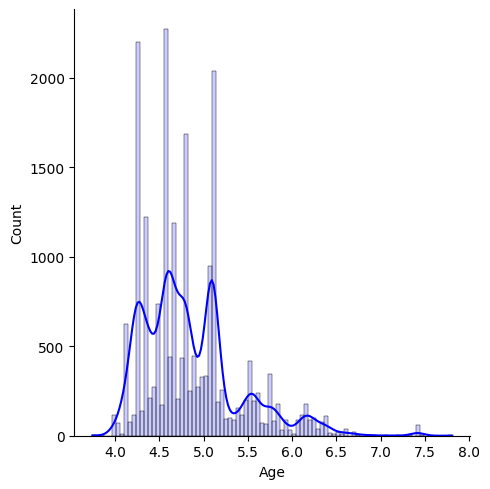

In [137]:
sns.displot(sqr_age, kde=True, alpha=0.2, color='blue')

In [138]:
cbrt_age = np.cbrt(df_train['Age'])
cbrt_age.head(15)

0     2.902139
1     2.620741
2     2.620741
3     2.756853
4     3.162888
5     2.626951
6     3.103189
7     3.103481
8     2.571282
9     2.962496
10    2.714418
11    2.802039
12    2.620741
13    2.776873
14    2.714418
Name: Age, dtype: float64

In [139]:
cbrt_age.skew()

1.056580825552711

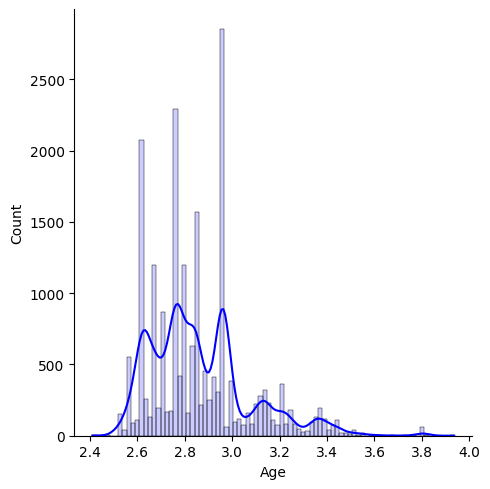

In [140]:
sns.displot(cbrt_age, kde=True, alpha=0.2, color='blue')

In [141]:
reciprocal_age = np.reciprocal(df_train['Age'])
reciprocal_age.head(15)

0     0.040911
1     0.055556
2     0.055556
3     0.047726
4     0.031604
5     0.055163
6     0.033464
7     0.033454
8     0.058824
9     0.038462
10    0.050000
11    0.045455
12    0.055556
13    0.046702
14    0.050000
Name: Age, dtype: float64

In [142]:
reciprocal_age.skew()

-0.2751334936738858

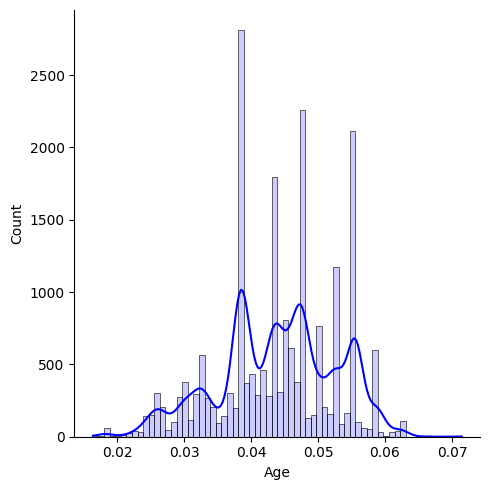

In [143]:
sns.displot(reciprocal_age, kde=True, alpha=0.2, color='blue')

In [144]:
# # Box plot
# fig, axs = plt.subplots(nrows=2)
# fig.set_size_inches(14, 8)

In [145]:
df_train['Age']=reciprocal_age

<Axes: >

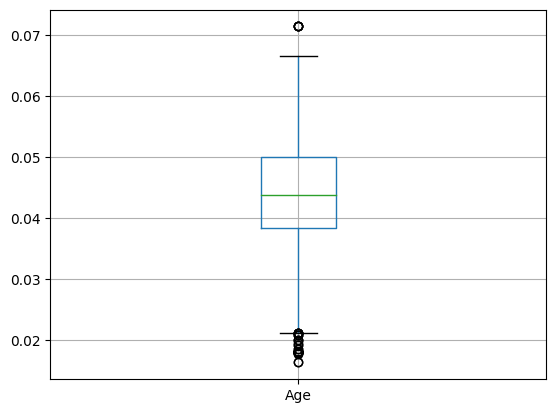

In [146]:
df_train.boxplot('Age')


In [147]:
reciprocal_age_test = np.reciprocal(df_test['Age'])

In [148]:
df_test['Age']=reciprocal_age_test

<Axes: >

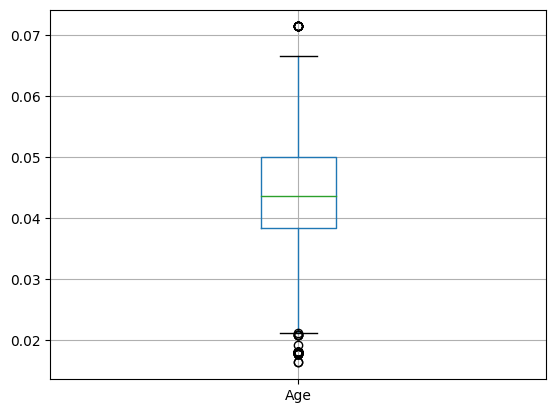

In [149]:
df_test.boxplot('Age')

In [150]:
df_test['NCP'].skew(), df_train['NCP'].skew()

(-1.5381359115021025, -1.5622532906429132)

<Axes: >

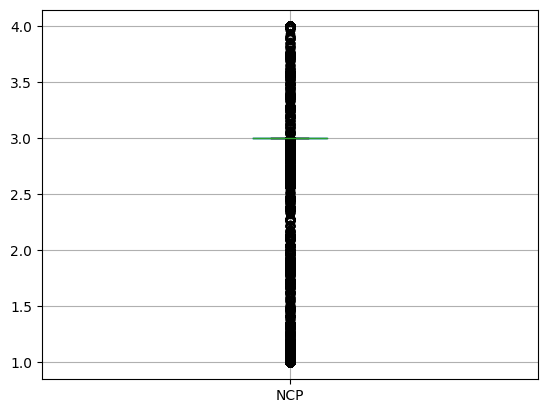

In [151]:
df_test.boxplot('NCP')

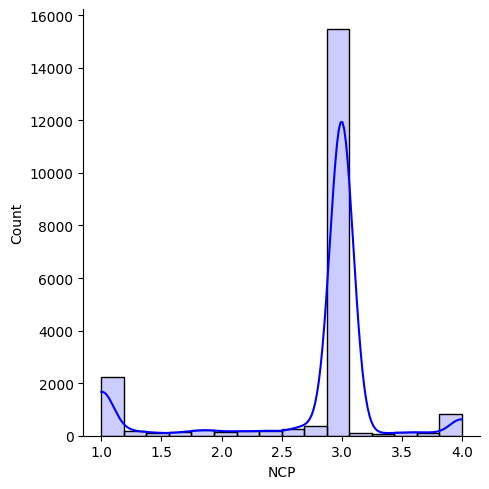

In [152]:
sns.displot(df_train['NCP'], kde=True, alpha=0.2, color='blue')

In [153]:
df_train.dtypes

id                                  int64
Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [154]:
X = df_train.drop('NObeyesdad', axis=1)
y = df_train['NObeyesdad']

In [155]:
cat_column = []
for col in X.select_dtypes(include='object').columns:
    cat_column.append(col)

In [156]:
cat_column

['Gender',
 'family_history_with_overweight',
 'FAVC',
 'CAEC',
 'SMOKE',
 'SCC',
 'CALC',
 'MTRANS']

In [157]:
enc = OneHotEncoder() 

In [158]:
enc_data = pd.DataFrame(enc.fit_transform( 
    X[cat_column]).toarray()) 

In [159]:
enc_data

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20754,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
20755,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
20756,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0


In [160]:
# column_names = [f"{col}_{category}" for category in enc_data.categories_[0]]

In [110]:
X

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,24.443011,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,0,...,1,0,0,1,0,0,0,0,1,0
1,1,18.000000,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,...,1,0,0,0,1,1,0,0,0,0
2,2,18.000000,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,1,...,1,0,0,0,1,0,0,0,1,0
3,3,20.952737,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,...,1,0,0,1,0,0,0,0,1,0
4,4,31.641081,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,25.137087,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,0,...,1,0,0,1,0,0,0,0,1,0
20754,20754,18.000000,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,0,...,1,0,0,1,0,0,0,0,1,0
20755,20755,20.101026,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,0,...,1,0,0,0,1,0,0,0,1,0
20756,20756,33.852953,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,0,...,1,0,0,0,1,1,0,0,0,0


In [173]:
X=pd.get_dummies(X)

In [174]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [175]:
X_train

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
9958,9958,0.058824,1.770000,97.000000,3.000000,3.000000,2.000000,3.000000,1.000000,0,...,1,0,0,0,1,1,0,0,0,0
7841,7841,0.044116,1.753389,54.877111,2.000000,4.000000,2.000000,2.000000,1.000000,0,...,1,0,0,0,1,0,0,0,1,0
9293,9293,0.045791,1.819867,122.024954,3.000000,2.880817,1.645338,0.739881,0.000000,0,...,1,0,0,1,0,0,0,0,1,0
15209,15209,0.024390,1.580000,80.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1,...,1,0,0,1,0,1,0,0,0,0
16515,16515,0.043478,1.800000,95.000000,3.000000,3.000000,3.000000,2.000000,1.000000,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11284,0.055556,1.722461,80.442775,2.628791,2.562895,1.844645,0.288032,0.722276,1,...,1,0,0,0,1,0,0,0,1,0
11964,11964,0.045455,1.750000,95.000000,3.000000,3.000000,2.000000,3.000000,0.000000,0,...,1,0,0,1,0,0,0,0,1,0
5390,5390,0.047619,1.620000,68.000000,2.000000,3.000000,3.000000,2.000000,0.000000,0,...,1,0,0,1,0,0,0,0,1,0
860,860,0.038462,1.650125,111.939671,3.000000,3.000000,2.770732,0.000000,0.237307,1,...,1,0,0,1,0,0,0,0,1,0


In [176]:
label_encoder = LabelEncoder()

In [177]:
y_train_encoded = label_encoder.fit_transform(y_train)
y_val_encoded = label_encoder.transform(y_val)

In [178]:
X_train

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
9958,9958,0.058824,1.770000,97.000000,3.000000,3.000000,2.000000,3.000000,1.000000,0,...,1,0,0,0,1,1,0,0,0,0
7841,7841,0.044116,1.753389,54.877111,2.000000,4.000000,2.000000,2.000000,1.000000,0,...,1,0,0,0,1,0,0,0,1,0
9293,9293,0.045791,1.819867,122.024954,3.000000,2.880817,1.645338,0.739881,0.000000,0,...,1,0,0,1,0,0,0,0,1,0
15209,15209,0.024390,1.580000,80.000000,2.000000,3.000000,1.000000,0.000000,0.000000,1,...,1,0,0,1,0,1,0,0,0,0
16515,16515,0.043478,1.800000,95.000000,3.000000,3.000000,3.000000,2.000000,1.000000,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,11284,0.055556,1.722461,80.442775,2.628791,2.562895,1.844645,0.288032,0.722276,1,...,1,0,0,0,1,0,0,0,1,0
11964,11964,0.045455,1.750000,95.000000,3.000000,3.000000,2.000000,3.000000,0.000000,0,...,1,0,0,1,0,0,0,0,1,0
5390,5390,0.047619,1.620000,68.000000,2.000000,3.000000,3.000000,2.000000,0.000000,0,...,1,0,0,1,0,0,0,0,1,0
860,860,0.038462,1.650125,111.939671,3.000000,3.000000,2.770732,0.000000,0.237307,1,...,1,0,0,1,0,0,0,0,1,0


In [166]:
import xgboost as xgb

In [179]:
def objective(trial):
    # Define hyperparameters to search
    params = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
        'min_child_weight': trial.suggest_loguniform('min_child_weight', 1e-8, 1.0),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
        'reg_lambda': trial.suggest_uniform('reg_lambda', 0.0, 1.0)
    }

    # Initialize XGBoost classifier
    model = xgb.XGBClassifier(**params, use_label_encoder=False, eval_metric='mlogloss')

    # Fit the model
    model.fit(X_train, y_train_encoded)

    # Predict on the validation set
    y_pred_encoded = model.predict(X_val)

    # Decode the predictions back to original labels
    y_pred = label_encoder.inverse_transform(y_pred_encoded)

    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_pred)

    return accuracy



In [168]:
# import optuna

In [180]:
# Define study
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.CmaEsSampler())

[I 2024-02-08 20:20:24,841] A new study created in memory with name: no-name-d8a11e5d-8cbf-4db6-8581-416236841b8d


In [181]:
# Optimize hyperparameters
study.optimize(objective, n_trials=100)

C:\Users\md.owais\AppData\Local\Temp\ipykernel_13940\4164620046.py:5: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.5),
C:\Users\md.owais\AppData\Local\Temp\ipykernel_13940\4164620046.py:7: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
C:\Users\md.owais\AppData\Local\Temp\ipykernel_13940\4164620046.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'min_child_weight': trial.suggest_logunifor

In [182]:
# Get the best hyperparameters
best_params = study.best_params
best_params['eval_metric'] = 'mlogloss'


In [183]:
# Train the final model with the best hyperparameters
final_model = xgb.XGBClassifier(**best_params, use_label_encoder=False)
final_model.fit(X_train, y_train_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7040637931946531, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='mlogloss', feature_types=None,
              gamma=2.774083553469054e-05, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.032325254186861406, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=0.0005780083698392568, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=153,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [184]:
# Predict on the test set
y_pred_encoded = final_model.predict(X_val)

In [185]:
# Decode the predictions back to original labels
y_pred = label_encoder.inverse_transform(y_pred_encoded)

In [186]:
# Calculate the accuracy
accuracy = accuracy_score(y_val, y_pred)
print('Validation Accuracy:', accuracy)

Validation Accuracy: 0.910645472061657


In [187]:
df_test

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,0.037175,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,0.047619,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,0.038462,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,0.047666,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,0.038462,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,Male,0.042867,1.721384,78.030383,yes,no,2.813234,3.000000,Sometimes,no,1.000000,no,0.807076,0.778632,Sometimes,Public_Transportation
13836,34594,Female,0.034483,1.590000,62.000000,no,yes,3.000000,3.000000,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
13837,34595,Female,0.043600,1.585547,44.376637,no,yes,3.000000,2.273740,Frequently,no,2.000000,no,1.949840,1.000000,Sometimes,Public_Transportation
13838,34596,Male,0.047619,1.620000,53.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,3.000000,2.000000,no,Public_Transportation


In [191]:
X

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,...,SCC_no,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,0.040911,1.699998,81.669950,2.000000,2.983297,2.763573,0.000000,0.976473,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0.055556,1.560000,57.000000,2.000000,3.000000,2.000000,1.000000,1.000000,1,...,1,0,0,0,1,1,0,0,0,0
2,2,0.055556,1.711460,50.165754,1.880534,1.411685,1.910378,0.866045,1.673584,1,...,1,0,0,0,1,0,0,0,1,0
3,3,0.047726,1.710730,131.274851,3.000000,3.000000,1.674061,1.467863,0.780199,1,...,1,0,0,1,0,0,0,0,1,0
4,4,0.031604,1.914186,93.798055,2.679664,1.971472,1.979848,1.967973,0.931721,0,...,1,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20753,20753,0.039782,1.766626,114.187096,2.919584,3.000000,2.151809,1.330519,0.196680,0,...,1,0,0,1,0,0,0,0,1,0
20754,20754,0.055556,1.710000,50.000000,3.000000,4.000000,1.000000,2.000000,1.000000,0,...,1,0,0,1,0,0,0,0,1,0
20755,20755,0.049749,1.819557,105.580491,2.407817,3.000000,2.000000,1.158040,1.198439,0,...,1,0,0,0,1,0,0,0,1,0
20756,20756,0.029540,1.700000,83.520113,2.671238,1.971472,2.144838,0.000000,0.973834,0,...,1,0,0,0,1,1,0,0,0,0


In [188]:
x_test = pd.get_dummies(df_test)

In [190]:
x_test

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Female,...,SCC_yes,CALC_Always,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,20758,0.037175,1.848294,120.644178,2.938616,3.000000,2.825629,0.855400,0.000000,0,...,0,0,0,1,0,0,0,0,1,0
1,20759,0.047619,1.600000,66.000000,2.000000,1.000000,3.000000,1.000000,0.000000,1,...,0,0,0,1,0,0,0,0,1,0
2,20760,0.038462,1.643355,111.600553,3.000000,3.000000,2.621877,0.000000,0.250502,1,...,0,0,0,1,0,0,0,0,1,0
3,20761,0.047666,1.553127,103.669116,2.000000,2.977909,2.786417,0.094851,0.000000,0,...,0,0,0,1,0,0,0,0,1,0
4,20762,0.038462,1.627396,104.835346,3.000000,3.000000,2.653531,0.000000,0.741069,1,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13835,34593,0.042867,1.721384,78.030383,2.813234,3.000000,1.000000,0.807076,0.778632,0,...,0,0,0,1,0,0,0,0,1,0
13836,34594,0.034483,1.590000,62.000000,3.000000,3.000000,2.000000,0.000000,0.000000,1,...,0,0,0,1,0,0,0,0,1,0
13837,34595,0.043600,1.585547,44.376637,3.000000,2.273740,2.000000,1.949840,1.000000,1,...,0,0,0,1,0,0,0,0,1,0
13838,34596,0.047619,1.620000,53.000000,2.000000,3.000000,2.000000,3.000000,2.000000,0,...,0,0,0,0,1,0,0,0,1,0


In [192]:
test_X = x_test.reindex(columns=X.columns, fill_value=0)

In [ ]:
len()

In [194]:
y_pred = final_model.predict(test_X)

In [195]:
test_y_pred = label_encoder.inverse_transform(y_pred)

In [196]:
submission_df = pd.DataFrame({
    'id': df_test['id'],
    'NObeyesdad': test_y_pred
})

In [197]:
submission_df

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Overweight_Level_I
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight


In [200]:
submission_df.to_csv('../data/out.csv', index=False)